In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv('mcdonalds.csv')
data.head()
data.shape

(1453, 15)

In [4]:
X = data.iloc[:, 0:11].values
print(X)

[['No' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['No' 'Yes' 'Yes' ... 'Yes' 'Yes' 'No']
 ...
 ['Yes' 'Yes' 'No' ... 'Yes' 'No' 'No']
 ['Yes' 'Yes' 'No' ... 'No' 'Yes' 'No']
 ['No' 'Yes' 'No' ... 'Yes' 'No' 'Yes']]


In [5]:
X = (X == "Yes").astype(int)
y = np.round(np.mean(X,axis = 0),2)
print(y)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [6]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA()

In [7]:
print("standard deviation:", np.sqrt(pca.explained_variance_))
print("Proportion of variance explained by each component:", pca.explained_variance_ratio_)
print("Cumulative proportion of variance explained:", np.cumsum(pca.explained_variance_ratio_))

standard deviation: [0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]
Proportion of variance explained by each component: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative proportion of variance explained: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [8]:
np.set_printoptions(precision=1, suppress=True)

In [9]:
pca_std = np.sqrt(pca.explained_variance_)
print(pca_std[:11])

[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [11]:
MD_pca = PCA().fit(X)
print(MD_pca)
print(pd.DataFrame(MD_pca.components_))

PCA()
          0         1         2         3         4         5         6   \
0  -0.476933 -0.155332 -0.006356  0.116232  0.304443 -0.108493 -0.337186   
1   0.363790  0.016414  0.018809 -0.034094 -0.063839 -0.086972 -0.610633   
2  -0.304444 -0.062515 -0.037019 -0.322359 -0.802373 -0.064642 -0.149310   
3   0.055162 -0.142425  0.197619 -0.354139  0.253960 -0.097363  0.118958   
4  -0.307535  0.277608  0.070620 -0.073405  0.361399  0.107930 -0.128973   
5   0.170738 -0.347830 -0.355087 -0.406515  0.209347 -0.594632 -0.103241   
6  -0.280519 -0.059738  0.707637 -0.385943  0.036170 -0.086846 -0.040449   
7   0.013041 -0.113079  0.375934  0.589622 -0.138241 -0.627799  0.140060   
8   0.572403 -0.018465  0.400280 -0.160512 -0.002847  0.166197  0.076069   
9  -0.110284 -0.665818 -0.075634 -0.005338  0.008707  0.239532  0.428087   
10  0.045439 -0.541616  0.141730  0.250910  0.001642  0.339265 -0.489283   

          7         8         9         10  
0  -0.471514  0.329042 -0.213711  0.

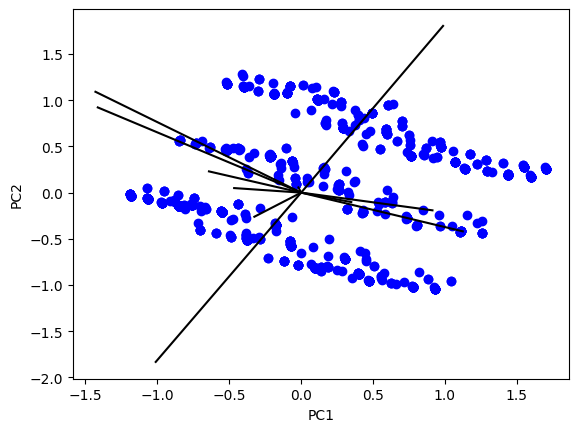

In [12]:
import matplotlib.pyplot as plt
pca = PCA()
pca.fit(X)
pc_scores = pca.transform(X)[:, :2]
plt.scatter(pc_scores[:, 0], pc_scores[:, 1], c='blue')
pca_rot = pca.components_
scale = 3.0  
for i, (x, y) in enumerate(zip(pca_rot[0, :], pca_rot[1, :])):
    plt.plot([0, x*scale], [0, y*scale], color='black', linewidth=1.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


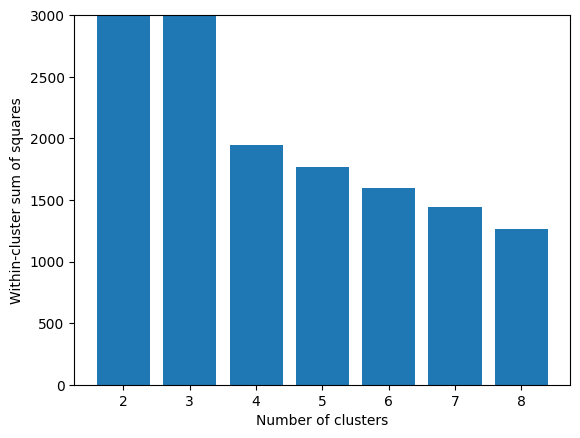

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Set random seed
np.random.seed(1234)

# Generate random data
X, y = make_blobs(n_samples=1000, centers=4, random_state=42)

# Perform k-means clustering with 2 to 8 clusters and 10 repetitions
wcss = []
for i in range(2, 9):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Create bar plot
plt.bar(range(2, 9), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.ylim(top=3000)
plt.yticks([0, 500, 1000, 1500,2000,2500,3000])
plt.show()
